# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
12933,Resort Hotel,1,134,2019,September,30,24,1,3,2,...,0,No Deposit,240.0,NaN,0,Personal,200.0,0,1,Canceled
21992,Resort Hotel,0,13,2018,May,12,14,1,0,2,...,3,No Deposit,NaN,NaN,0,Personal,45.0,0,0,Check-Out
103905,City Hotel,0,6,2018,February,53,30,1,2,2,...,0,No Deposit,9.0,NaN,0,Personal,126.0,0,0,Check-Out
32476,Resort Hotel,0,6,2019,March,4,22,2,4,2,...,0,No Deposit,250.0,NaN,0,Personal,108.0,1,0,Check-Out
9090,Resort Hotel,1,69,2018,December,44,27,2,4,3,...,0,No Deposit,240.0,NaN,0,Personal,116.0,0,0,Canceled


In [4]:
df[['adults', 'children', 'babies', 'meal', 'city', 'market_segment', 'distribution_channel', 
    'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']].sample(5)

,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
86950,1,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0
41834,2,0.0,0,Breakfast,Kota Batu,Groups,TA/TO,0,0,0
84769,2,0.0,0,Dinner,Kota Yogyakarta,Online TA,TA/TO,0,0,0
108570,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0
18622,2,0.0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- The dataset had 29 columns with 119390  rows.
- city, children, company, and agent had missing values 
- children, agent, and company had invalid the data types. we would like to change it later.

In [6]:
# count the features with missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
# analysis descriptif for numerical feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
# analysis descriptif for categorical features
df.astype('object').describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
lead_time,119390,479,0,6345
arrival_date_year,119390,3,2018,56707
arrival_date_month,119390,12,October,13877
arrival_date_week_number,119390,53,33,3580
arrival_date_day_of_month,119390,31,17,4406
stays_in_weekend_nights,119390,17,0,51998
stays_in_weekdays_nights,119390,35,2,33684
adults,119390,14,2,89680


In [9]:
df.adults.value_counts() 

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [10]:
df.children.value_counts() 

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [11]:
df.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

### `Handling Missing Values`

In [12]:
df['children'] = df['children'].fillna(0) # filled with 0 to assume there was no child in the hotel booking 
df['city'] = df['city'].fillna('unknown') #filled with 'unknown' to assume the guests could be known which city they came from 
df['agent'] = df['agent'].fillna(0) # it means that the booking didn't come from the agent
df['company'] = df['company'].fillna(0) #it means that the booking didn't come from the company

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df[df.duplicated()].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
15187,Resort Hotel,1,253,2017,November,37,12,2,5,2,...,0,Non Refund,96.0,0.0,0,Personal,58.95,0,0,Canceled
19187,Resort Hotel,1,92,2018,April,9,26,1,2,2,...,0,Non Refund,134.0,0.0,0,Personal,79.00,0,0,Canceled
79227,City Hotel,1,444,2018,February,49,1,0,3,1,...,0,Non Refund,34.0,0.0,39,Personal,75.00,0,0,Canceled
117080,City Hotel,0,177,2019,September,30,27,0,2,2,...,0,No Deposit,138.0,0.0,0,Personal,89.00,0,1,Check-Out
66940,City Hotel,1,88,2019,June,17,26,0,3,2,...,0,Non Refund,170.0,0.0,0,Personal,140.00,0,0,Canceled


### `change the data types`

In [15]:
# these features had float as the data type, we would change into integer
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [16]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
26854,Resort Hotel,0,37,2018,October,33,11,0,2,3,...,2,No Deposit,250,0,0,Personal,327.6,0,0,Check-Out
92883,City Hotel,0,52,2018,September,29,12,0,2,3,...,1,No Deposit,9,0,0,Personal,137.7,0,1,Check-Out
27009,Resort Hotel,0,197,2018,October,33,10,2,5,2,...,0,No Deposit,240,0,0,Personal,182.0,0,1,Check-Out


### `Replace values`

In [17]:
df.meal.value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [18]:
#change no undefined with no meal
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

In [19]:
df.meal.value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### `create new columns`

In [20]:
# new column named guest
df['guest'] = df['adults'] + df['children'] + df['babies']

In [21]:
df.guest.value_counts().to_frame()

,guest
2,82051
1,22581
3,10495
4,3929
0,180
5,137
26,5
12,2
27,2
20,2


In [22]:
#drop the guests rows that had a total number of guests = 0
df_cleaning = df[df['guest'] > 0]
df_cleaning

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.00,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.00,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,No Deposit,394,0,0,Personal,96.14,0,0,Check-Out,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,No Deposit,9,0,0,Personal,225.43,0,2,Check-Out,3
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,No Deposit,9,0,0,Personal,157.71,0,4,Check-Out,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,No Deposit,89,0,0,Personal,104.40,0,0,Check-Out,2


In [25]:
# save the dataframe
df_cleaning.to_csv('hotel_cleaning.csv', index=False)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn

In [27]:
df_cleaning = pd.read_csv('hotel_cleaning.csv')
df_cleaning.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
92532,City Hotel,0,46,2018,September,28,8,0,1,1,...,No Deposit,9,0,0,Personal,112.5,0,2,Check-Out,1
107277,City Hotel,0,220,2019,May,10,10,1,2,2,...,No Deposit,9,0,0,Personal,99.2,0,1,Check-Out,2
85187,City Hotel,0,16,2018,May,11,11,0,1,2,...,No Deposit,0,215,0,Family,75.0,0,0,Check-Out,2
86615,City Hotel,0,23,2019,May,11,12,1,0,2,...,No Deposit,0,197,0,Personal,85.0,0,1,Check-Out,2
34491,Resort Hotel,0,143,2019,May,12,20,2,5,2,...,No Deposit,464,0,0,Personal,48.0,0,1,Check-Out,2


In [29]:
# there were 3 years of arrival date_year
df_cleaning.arrival_date_year.value_counts().sort_values().to_frame()

,arrival_date_year
2017,21967
2019,40620
2018,56623


In [30]:
# how many months in 2017
df_cleaning['arrival_date_month'][df_cleaning['arrival_date_year'] == 2017].value_counts().to_frame()

,arrival_date_month
November,5109
December,4951
October,3883
February,2913
September,2774
January,2337


In [31]:
# how many months in 2018
df_cleaning['arrival_date_month'][df_cleaning['arrival_date_year'] == 2018].value_counts().to_frame()

,arrival_date_month
December,6196
July,5475
June,5425
November,5391
August,5290
October,5055
May,4819
September,4560
January,4434
April,3884


In [32]:
# how many months in 2018
df_cleaning['arrival_date_month'][df_cleaning['arrival_date_year'] == 2019].value_counts().to_frame()

,arrival_date_month
July,6305
June,5653
August,5639
September,5310
May,4949
October,4923
April,4168
March,3673


In [35]:
# filtering the data to get monthly hotel booking
df_monthly_booking = df_cleaning.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
# change the columns name 
df_monthly_booking.columns = ['hotel_type', 'arrival_month', 'arrival_year_unique', 'total_booking']
# df_monthly_booking.sort_values(['arrival_year_unique', 'total_booking'], ascending=[True, False])

In [38]:
# sorting the total booking with descending
df_monthly_booking.sort_values('total_booking', ascending=False)

,hotel_type,arrival_month,arrival_year_unique,total_booking
10,City Hotel,October,3,8967
5,City Hotel,July,2,8221
11,City Hotel,September,3,8071
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
6,City Hotel,June,2,7469
9,City Hotel,November,2,7392
8,City Hotel,May,2,6434
0,City Hotel,April,2,4950
22,Resort Hotel,October,3,4894


- data from September and October were taken from 3 years ago, and other months were from 2 years ago.
- this data would be normalized so the comparison was appropriate.


### `The percentage of hotel type`

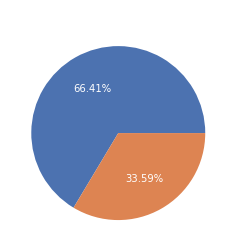

In [39]:
# show the percentage of hotel type
plt.title('The percentage of Hotel Type', fontsize=15, color='White')
colors = sn.color_palette('deep')
plt.pie(df_cleaning['hotel'].value_counts().values, labels= df_cleaning['hotel'].value_counts().index, 
        colors = colors, autopct='%.2f%%', textprops={'color': 'w'})
plt.show()

### `data normalization`

In [40]:
# normalization by calculating the average of total bookings in different years
df_monthly_booking['avg_booking'] = round(df_monthly_booking['total_booking'] / df_monthly_booking['arrival_year_unique'],0)
df_monthly_booking

,hotel_type,arrival_month,arrival_year_unique,total_booking,avg_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


### `sorted months`

In [41]:
# create new columns
sorted_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_monthly_booking['month'] = df_monthly_booking['arrival_month'].str[:3] #took 3 letters from arrival_month
df_monthly_booking['month'] = pd.Categorical(df_monthly_booking['month'], categories=sorted_months, ordered=True)
df_monthly_booking

,hotel_type,arrival_month,arrival_year_unique,total_booking,avg_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


(0.0, 4500.0)

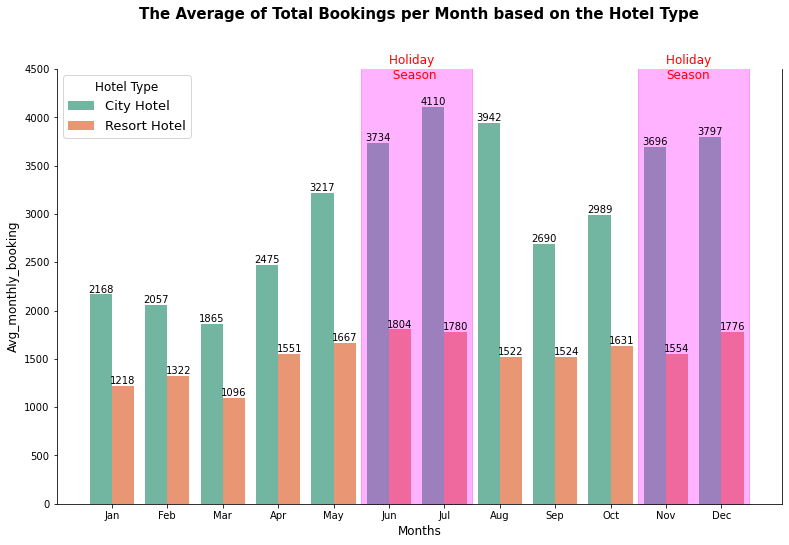

In [82]:
plt.figure(figsize=(13,8))
plt.title("The Average of Total Bookings per Month based on the Hotel Type", fontsize=15, color='black', weight='bold', pad=50)

ax = sn.barplot(x='month', y ='avg_booking', data=df_monthly_booking, hue='hotel_type', palette='Set2')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.spines["top"].set_visible(False)

plt.legend(title='Hotel Type', title_fontsize=12, prop={'size':13}) # customize the legend
plt.text(x=5, y=4400, s='Holiday \n Season', fontsize=12, color='red') # add text
plt.stackplot(np.arange(4.5,7,1), [[4800]], color='magenta', alpha=0.3) # give block colors

plt.text(x=10, y=4400, s='Holiday \nSeason', fontsize=12, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9.5,12,1), [[4800]], color='magenta', alpha=0.3) # memberikan blok warna pada

plt.xlabel('Months', fontsize=12)
plt.ylabel('Avg_monthly_booking', fontsize=12)
plt.ylim(0, 4500)



- Jun - Jul is the longest holiday season in Indonesia for students, and nov - dec is the year-end holiday 
- Both the type of hotels had more guests during holiday season.
- City hotels had the most booked hotel type in 2017-2019 period.
- Aug - sep gradually decreased due to long holiday is over.

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### `The Distribution of Stay Duration`

In [84]:
# new column named total_Stays_per_day
df_cleaning['total_stays_per_day'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

<AxesSubplot:xlabel='total_stays_per_day', ylabel='Count'>

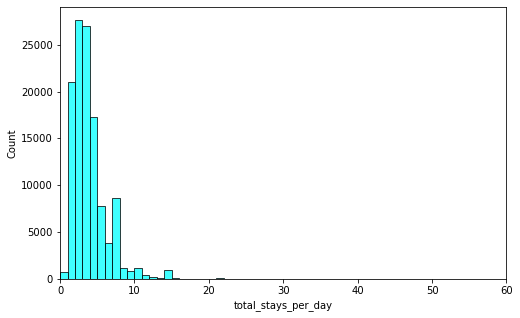

In [85]:
# show the distribution of stay duration
plt.figure(figsize=(8,5))
plt.xlim(0, 60)
sn.histplot(df_cleaning['total_stays_per_day'], binwidth=1, color='cyan')

 - most guests stayed 1 night to 4 nights. Few guests stay more than 10 days. 
 - the stay distribution had right-skewed thus, We would like to group this stay duration into weeeks.

### `grouping the stay duration`

In [86]:
list_duration = []
for i in df_cleaning['total_stays_per_day']:
    if i>=0 and i<=7:
        group = '1 week'
    elif i>=8 and i<=14:
        group = '2 weeks'
    elif i>=15 and i<=21:
        group= '3 weeks'
    elif i>=22 and i<=28:
        group = '4 weeks'
    else:
        group = '>4 weeks'
    list_duration.append(group)
df_cleaning['total_stay_duration_in_week'] = list_duration

In [88]:
df_cleaning.total_stay_duration_in_week.value_counts()

1 week      113959
2 weeks       4812
3 weeks        277
4 weeks        111
>4 weeks        51
Name: total_stay_duration_in_week, dtype: int64

In [89]:
df_stay_duration = df_cleaning.groupby(['hotel', 'total_stay_duration_in_week', 'is_canceled']).agg({'guest' : 'count', }).reset_index()
df_stay_duration.rename(columns={'guest' : 'num_bookings'}, inplace=True)
df_stay_duration

,hotel,total_stay_duration_in_week,is_canceled,num_bookings
0,City Hotel,1 week,0,45503
1,City Hotel,1 week,1,32405
2,City Hotel,2 weeks,0,521
3,City Hotel,2 weeks,1,571
4,City Hotel,3 weeks,0,41
5,City Hotel,3 weeks,1,68
6,City Hotel,4 weeks,0,11
7,City Hotel,4 weeks,1,17
8,City Hotel,>4 weeks,0,8
9,City Hotel,>4 weeks,1,18


### `cancellation rate`

In [90]:
df_cleaning.guest.value_counts()

2     82051
1     22581
3     10495
4      3929
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: guest, dtype: int64

In [91]:
df_stay_pivot = df_cleaning.pivot_table(index=['hotel', 'total_stay_duration_in_week'], columns=['is_canceled'], 
                                        values=['guest'], aggfunc={'guest':'count'}).reset_index()
df_stay_pivot.columns = ['hotel', 'total_stay', 'not_cancelled', 'cancelled']
df_stay_pivot['cancellation_rate'] = round((df_stay_pivot['cancelled']) /
                                           (df_stay_pivot['not_cancelled'] + df_stay_pivot['cancelled']) *100, 2)
df_stay_pivot

,hotel,total_stay,not_cancelled,cancelled,cancellation_rate
0,City Hotel,1 week,45503,32405,41.59
1,City Hotel,2 weeks,521,571,52.29
2,City Hotel,3 weeks,41,68,62.39
3,City Hotel,4 weeks,11,17,60.71
4,City Hotel,>4 weeks,8,18,69.23
5,Resort Hotel,1 week,26207,9844,27.31
6,Resort Hotel,2 weeks,2564,1156,31.08
7,Resort Hotel,3 weeks,96,72,42.86
8,Resort Hotel,4 weeks,43,40,48.19
9,Resort Hotel,>4 weeks,17,8,32.00


Text(0, 0.5, 'Cancellation Rate(%)')

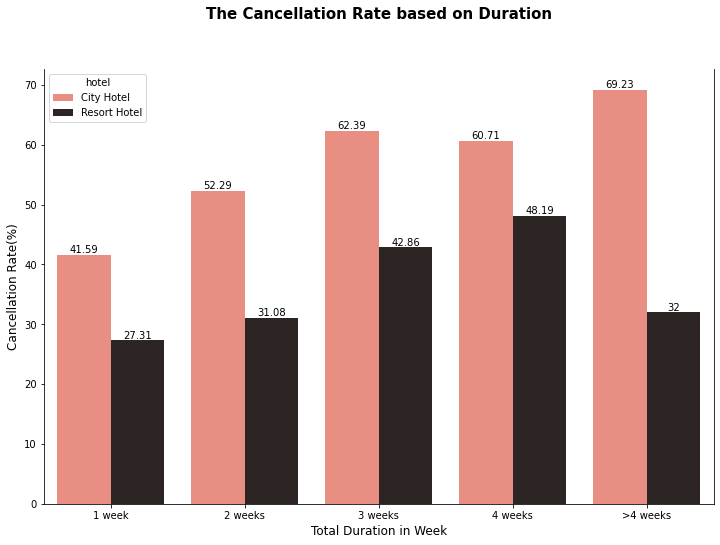

In [100]:
plt.figure(figsize=(12,8))
plt.title("The Cancellation Rate based on Duration", fontsize=15, color='black', weight='bold', pad=50)
ax = sn.barplot(data=df_stay_pivot, x='total_stay', y='cancellation_rate', hue='hotel', palette='dark:salmon_r')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.spines["top"].set_visible(False)


plt.xlabel('Total Duration in Week', fontsize=12)
plt.ylabel('Cancellation Rate(%)', fontsize=12)




- The most cancellation rate of hotel booking was city hotel. 
- The more extended guests stayed in the city hotel, the higher the percentage of bookings being cancelled.
- The highest cancellation was city hotel for more than 4 weeks duration.

# Impact Analysis Lead Time on Hotel Booking Cancellation Rate

In [65]:
df_cleaning.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'guest', 'total_stays_per_day',
       'total_stay_duration_in_week'],
      dtype='object')

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

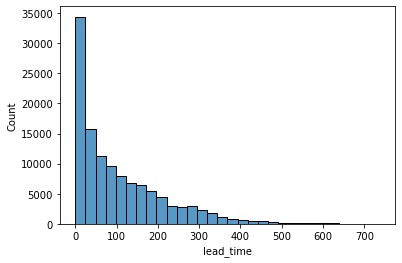

In [61]:
# show the lead_time distribution
sn.histplot(df.lead_time, bins=30)

In [ ]:
- the lead time feature had right-skewed. we would like to make group 

In [62]:
# max lead_time 
df_cleaning.lead_time.max()

709

### `grouping the lead duration`

In [63]:
# create new feature to group the lead duration
list_time = []
for i in df_cleaning['lead_time'] :
    if i <= 30:
        group = '1 month'
    elif i >= 31 and i <= 120:
        group = '2-4 months'
    elif i >=121 and i <= 210:
        group = '5-7 months'
    elif i >=211 and i <= 300:
        group = '8-10 months'
    elif i >= 301 and i <=360:
        group = '11-12 months'
    else :
        group = 'over 1 year'
    list_time.append(group)

In [ ]:
df_cleaning['lead_time_group'] = list_time

In [66]:
df_cleaning.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_stays_per_day,total_stay_duration_in_week,lead_time_group
103825,City Hotel,0,143,2019,March,3,20,0,2,2,...,0,Personal,93.6,0,2,Check-Out,2,2,1 week,5-7 months
65080,City Hotel,1,69,2019,June,14,6,0,3,1,...,0,Personal,85.0,0,0,Canceled,1,3,1 week,2-4 months
9344,Resort Hotel,1,76,2018,January,49,29,0,2,2,...,0,Family,50.0,0,0,Canceled,2,2,1 week,2-4 months
84309,City Hotel,0,78,2018,May,10,3,1,3,2,...,0,Personal,60.0,0,2,Check-Out,3,4,1 week,2-4 months
13239,Resort Hotel,1,172,2019,October,32,10,2,5,2,...,0,Personal,250.0,0,2,Canceled,2,7,1 week,5-7 months


In [68]:
df_cleaning.lead_time_group.value_counts().sort_values(ascending=False).to_frame()

,lead_time_group
2-4 months,39777
1 month,38048
5-7 months,21560
8-10 months,11089
11-12 months,4443
over 1 year,3410


In [72]:
df_lead_group = df_cleaning.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'lead_time' : 'count'}).reset_index()
df_lead_group

,hotel,lead_time_group,is_canceled,lead_time
0,City Hotel,1 month,0,17815
1,City Hotel,1 month,1,5161
2,City Hotel,11-12 months,0,728
3,City Hotel,11-12 months,1,2599
4,City Hotel,2-4 months,0,16351
5,City Hotel,2-4 months,1,11764
6,City Hotel,5-7 months,0,7263
7,City Hotel,5-7 months,1,7027
8,City Hotel,8-10 months,0,2745
9,City Hotel,8-10 months,1,4358


In [73]:
df_lead_group_pivot = df_lead_group.pivot_table(index=['hotel', 'lead_time_group'], 
                                               columns=['is_canceled'],
                                               values=['lead_time'] ).reset_index()
df_lead_group_pivot.columns=['hotel', 'lead_time_group', 'not_canceled', 'canceled']
df_lead_group_pivot

,hotel,lead_time_group,not_canceled,canceled
0,City Hotel,1 month,17815,5161
1,City Hotel,11-12 months,728,2599
2,City Hotel,2-4 months,16351,11764
3,City Hotel,5-7 months,7263,7027
4,City Hotel,8-10 months,2745,4358
5,City Hotel,over 1 year,790,2073
6,Resort Hotel,1 month,13096,1976
7,Resort Hotel,11-12 months,615,501
8,Resort Hotel,2-4 months,7663,3999
9,Resort Hotel,5-7 months,4585,2685


In [74]:
# create cancelation_rate
df_lead_group_pivot['cancelation_rate'] = round((df_lead_group_pivot['canceled'])*100 / 
                                               (df_lead_group_pivot['not_canceled'] + df_lead_group_pivot['canceled']), 2)
df_lead_group_pivot

,hotel,lead_time_group,not_canceled,canceled,cancelation_rate
0,City Hotel,1 month,17815,5161,22.46
1,City Hotel,11-12 months,728,2599,78.12
2,City Hotel,2-4 months,16351,11764,41.84
3,City Hotel,5-7 months,7263,7027,49.17
4,City Hotel,8-10 months,2745,4358,61.35
5,City Hotel,over 1 year,790,2073,72.41
6,Resort Hotel,1 month,13096,1976,13.11
7,Resort Hotel,11-12 months,615,501,44.89
8,Resort Hotel,2-4 months,7663,3999,34.29
9,Resort Hotel,5-7 months,4585,2685,36.93


Text(0, 0.5, 'Cancelation Rate(%)')

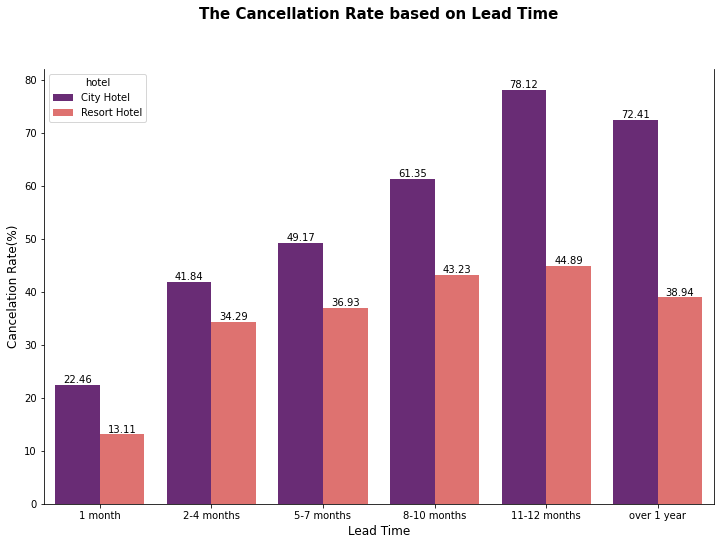

In [119]:
plt.figure(figsize=(12,8))
plt.title("The Cancellation Rate based on Lead Time", fontsize=15, color='black', weight='bold', pad=50)
ax = sn.barplot(data=df_lead_group_pivot, x='lead_time_group', y='cancelation_rate', hue='hotel', 
                order=['1 month', '2-4 months', '5-7 months', '8-10 months', '11-12 months', 'over 1 year'], 
                palette='magma')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.spines["top"].set_visible(False)


plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Cancelation Rate(%)', fontsize=12)




- Both the city hotel and resort hotel had the lowest cancellation rate based on 1 month lead time
- Both city hotel and resort hotel had the highest cancellation rate based on 11-12 month lead time
- the longer the lead time, the bigger chances the booking being cancelled
- the cancellation percentage in Resort hotels was relatively stagnant around 40% for each lead time. 
- while the cancellation percentage of city hotel was above 60% with lead time around 1 year.